In [1]:
import warnings
warnings.simplefilter('ignore')
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
import numpy as np
from defsvm import plot_decision_regions
from sklearn.metrics import accuracy_score

df = pd.read_csv('datasets/sms_spam_perceptron.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.linear_model import Perceptron

p = Perceptron(max_iter=40, eta0=0.1, random_state=0)
p.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [4]:
y_pred = p.predict(X_test)

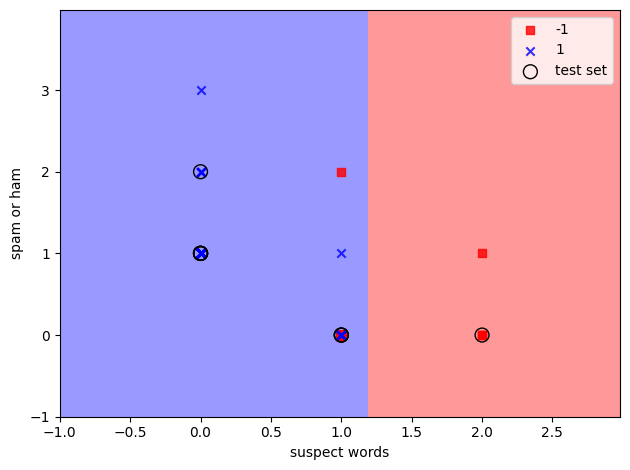

In [5]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=p, test_idx=range(-5, 5))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [6]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 6
Accuracy: 0.80


In [7]:
# Prepare the features and labels
X = df[['sex', 'buy']].values
y = (df['type'] == 'spam').astype(int)  # Convert 'ham' to 0, 'spam' to 1

# Modify the weights for 'buy' column (double its importance)
X[:, 1] *= 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Perceptron classifier
clf = Perceptron(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
classification_report_str = classification_report(y_test, y_pred)

classification_report_str


'              precision    recall  f1-score   support\n\n           0       0.94      0.81      0.87        21\n           1       0.67      0.89      0.76         9\n\n    accuracy                           0.83        30\n   macro avg       0.81      0.85      0.82        30\nweighted avg       0.86      0.83      0.84        30\n'

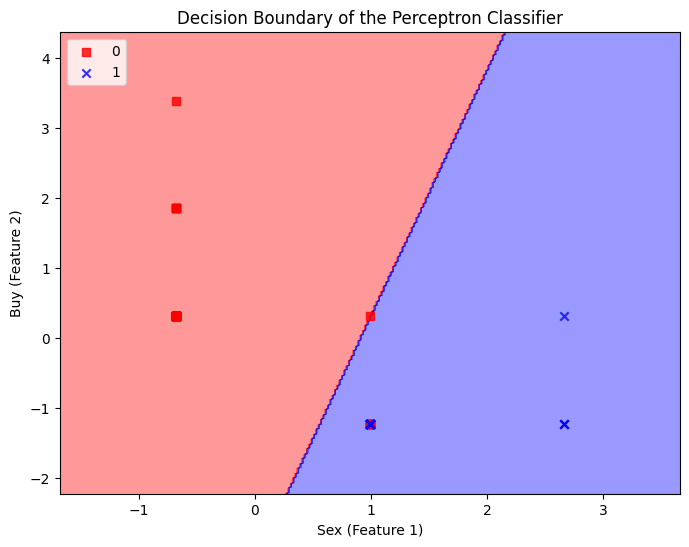

In [8]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier=clf)
plt.title("Decision Boundary of the Perceptron Classifier")
plt.xlabel("Sex (Feature 1)")
plt.ylabel("Buy (Feature 2)")
plt.legend(loc='upper left')
plt.show()

In [9]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 5
Accuracy: 0.83


# SVM

In [10]:
df = pd.read_csv('datasets/sms_spam_svm.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


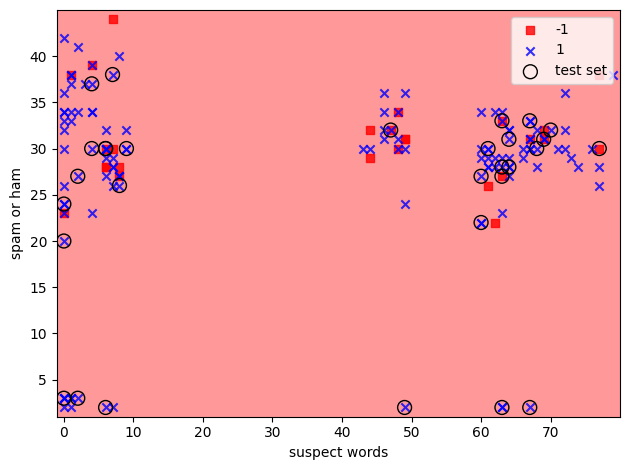

In [13]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=svm, test_idx=range(-15, 15))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [14]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.84
